#**KMEANS WITH NORMALISED MUTUTAL INFO SCORE**

In [0]:
import tensorflow as tf
from tensorflow import keras
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.datasets import mnist
import numpy as np
import sklearn.metrics as metrics

print("Normal KMeans Clustering")
(x_train, y_train), (x_test,y_test) = keras.datasets.fashion_mnist.load_data()
X = x_train.reshape(len(x_train),-1)
Y = y_train
X = X.astype(float) / 255.

x_test = x_test.reshape(len(x_test),-1)
x_test = x_test.astype(float) / 255.

n_digits = len(np.unique(y_test))
kmeans = KMeans(n_clusters = n_digits)
kmeans.fit(X)
predicted_labels = kmeans.predict(x_test)
cm = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix")
print(cm)
print('Accuracy: {}\n'.format(metrics.normalized_mutual_info_score(y_test, predicted_labels)))
print("CLASSIFICATION REPORT")
print(classification_report(y_test,predicted_labels))

Using TensorFlow backend.


Normal KMeans Clustering
Confusion Matrix
[[585  96 242  31   0   6  34   0   5   1]
 [ 50  22  28 891   0   0   9   0   0   0]
 [ 20  65 338   4   0   4 565   0   4   0]
 [277  99 105 504   0   2  10   0   3   0]
 [134  42 163  27   0   4 625   0   5   0]
 [  0 646   6   0  45   0   0  73   0 230]
 [189 121 355  12   0  15 308   0   0   0]
 [  0  59   0   0   2   0   0 152   0 787]
 [  3  87  30   7   1 355  60  10 408  39]
 [  0  29   4   0 423   0   0 519   2  23]]
Accuracy: 0.5123862279056837

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.47      0.58      0.52      1000
           1       0.02      0.02      0.02      1000
           2       0.27      0.34      0.30      1000
           3       0.34      0.50      0.41      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.19      0.31      0.24      1000
           7       0.20      0.15      0.1

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


# **KMEANS ACCURACY**

In [0]:
import tensorflow as tf
from tensorflow import keras
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.datasets import mnist
import numpy as np
import sklearn.metrics as metrics

print("Normal KMeans Clustering")
(x_train, y_train), (x_test,y_test) = keras.datasets.fashion_mnist.load_data()
X = x_train.reshape(len(x_train),-1)
Y = y_train
X = X.astype(float) / 255.

x_test = x_test.reshape(len(x_test),-1)
x_test = x_test.astype(float) / 255.

n_digits = len(np.unique(y_test))
kmeans = KMeans(n_clusters = n_digits)
kmeans.fit(X)

def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(x_test)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
cm = confusion_matrix(y_test, predicted_labels)
print("CM",cm)
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))
print("CLASSIFICATION REPORT")
print(classification_report(y_test,predicted_labels))

Normal KMeans Clustering
CM [[587  29   0   0  34  94 244   1  11   0]
 [ 50 890   0   0   9  22  29   0   0   0]
 [ 19   4   0   0 566  61 342   0   8   0]
 [277 503   0   0  10  93 112   0   5   0]
 [136  27   0   0 627  42 159   0   9   0]
 [  0   0   0   0   0 650   6 227   0 117]
 [189  12   0   0 311 115 358   0  15   0]
 [  0   0   0   0   0  62   0 785   0 153]
 [  3   6   0   0  61  84  35  40 761  10]
 [  0   0   0   0   0  29   4  23   2 942]]
Accuracy: 0.56

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.47      0.59      0.52      1000
           1       0.61      0.89      0.72      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.39      0.63      0.48      1000
           5       0.52      0.65      0.58      1000
           6       0.28      0.36      0.31      1000
           7       0.73      0.79      0.76      1000
           8    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# **AUTO ENCODER WITH KMEANS NORMALISED MUTUTAL INFO SCORE**

Using TensorFlow backend.


KMeans Clustering with AutoEncoder
4423680/4422102 [==============================] - 2s 0us/step
(60000, 784)
(10000, 784)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





Train on 60000 samples, validate on 10000 samples
Epoch 1/60





60000/60000 [==============================] - 5s 89us/step - loss: 1.0080 - val_loss: 0.7387
Epoch 2/60
60000/60000 [==============================] - 0s 6us/step - loss: 0.6244 - val_loss: 0.5369
Epoch 3/60
60000/60000 [==============================] - 0s 6us/step - loss: 0.4973 - val_loss: 0.4664
Epoch 4/60
60000/60000 [==============================] - 0s 6us/step - loss: 0.4503 - val_loss: 0.4381
Epoch 5/60
60000/60000 [==============================] - 0s 6us/step - loss: 0.4296 - val_loss: 0.4235
Epoch 6/60
60000/60000 [==============================] - 0s 6us/step - loss: 0.4176 - val_loss: 0.4137
Epoch 7/60
60000/60000 [==============================] - 0s 6us/step - loss: 0.4087 - val_los

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


60000/60000 [==============================] - 4s 67us/step - loss: 0.3230
Epoch 2/4
60000/60000 [==============================] - 5s 78us/step - loss: 0.3177
Epoch 3/4
60000/60000 [==============================] - 5s 75us/step - loss: 0.3140
Epoch 4/4
60000/60000 [==============================] - 4s 70us/step - loss: 0.3113
dict_keys(['loss'])


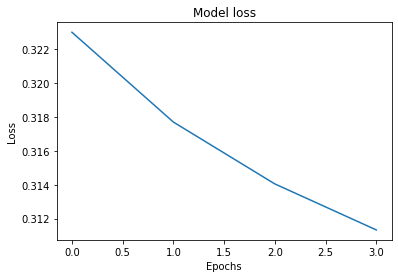

Epoch 1/4
10000/10000 [==============================] - 1s 68us/step - loss: 0.3119
Epoch 2/4
10000/10000 [==============================] - 1s 71us/step - loss: 0.3119
Epoch 3/4
10000/10000 [==============================] - 1s 67us/step - loss: 0.3110
Epoch 4/4
10000/10000 [==============================] - 1s 64us/step - loss: 0.3107


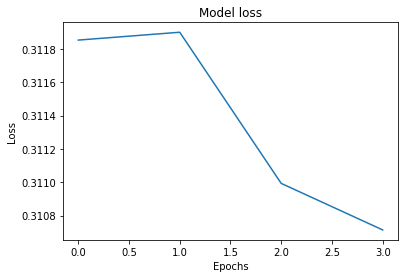

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, UpSampling2D, Activation
from keras import backend as K
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns
import sklearn.metrics as metrics
from keras import regularizers
from keras.layers import Input, Dense
from keras.models import Model

print("KMeans Clustering with AutoEncoder")

(x_train, y_train), (x_test,y_test) = keras.datasets.fashion_mnist.load_data()
#print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)


encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim,activation='selu',kernel_regularizer=regularizers.l2(0.01))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img,decoded)
encoder = Model(input_img,encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train,x_train, epochs=60, batch_size=2056, shuffle=True, validation_data=(x_test,x_test))
autoencoder.summary()
encoded_images = encoder.predict(x_test)
print("EncodedImagesSHape", encoded_images.shape) 

kmeans = KMeans(n_clusters=10)
kmeans.fit(encoded_images)
predicted_labels = kmeans.predict(encoded_images)

cm = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix is\n",cm)
print('Accuracy: {}\n'.format(metrics.normalized_mutual_info_score(y_test, predicted_labels)))
print("CLASSIFICATION REPORT")
print(classification_report(y_test,predicted_labels))

history = autoencoder.fit(x_train, x_train, epochs=4, batch_size=64, verbose=1)

# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

history = autoencoder.fit(x_test, x_test, epochs=4, batch_size=64, verbose=1)

# summarize history for test
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

# **AUTO ENCODER WITH GMM WITH NORMALIZED MUTUAL INFO SCORE** 

In [1]:
!pip install gmm_mml
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from gmm_mml import GmmMml
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import sklearn.metrics as metrics


print("Auto Encoder with GMM")
(x_train, y_train), (x_test,y_test) = keras.datasets.fashion_mnist.load_data()
#print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim,activation='selu',kernel_regularizer=regularizers.l2(0.01))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img,decoded)
encoder = Model(input_img,encoded)
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train,x_train, epochs=20, batch_size=2056, shuffle=True, validation_data=(x_test,x_test))
encoded_image = encoder.predict(x_test)

clf = GmmMml()
clf.fit(encoded_image)
cm = confusion_matrix(y_test, clf.predict(encoded_image))
print("CM",cm)

print('Accuracy: {}\n'.format(metrics.normalized_mutual_info_score(y_test, clf.predict(encoded_image))))
print("CLASSIFICATION REPORT")
print(classification_report(y_test,clf.predict(encoded_image)))

Using TensorFlow backend.


Auto Encoder with GMM
(60000, 784)
(10000, 784)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 1s 24us/step - loss: 1.0844 - val_loss: 0.8790
Epoch 2/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.7516 - val_loss: 0.6452
Epoch 3/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.6007 - val_loss: 0.5670
Epoch 4/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.5511 - val_loss: 0.5387
Epoch 5/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.5315 - val_loss: 0.5260
Epoch 6/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.5218 - val_loss: 0.5186
Epoch 7/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.5152 - val_loss: 0.5126
Epoch 8/20
60000/60000 [==============================] - 1s 9us/s

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
